In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Load and Pre-process the Data

In [6]:
data = pd.read_csv('simulated_transaction_2024.csv')
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [7]:
# Combine Date and Timestamp into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], dayfirst=True)

# Check the conversion
data['Datetime'].head()

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: Datetime, dtype: datetime64[ns]

# Data Mining

## Classify the transactions into different categories

In [8]:
# Getting the unique values of the "Third Party Name" column to understand potential categories
unique_third_parties = data['Third Party Name'].unique()
unique_third_parties

array(['Westport Care Home', 'Barbiee Boutique', nan, 'Fat Face',
       'Lavender Primary', 'A Cut Above', 'Tesco', 'Brilliant Brushes',
       'Costa Coffee', 'Premier Finance', 'North Face', 'Craftastic',
       'Fitted Stitch', 'Selfridges', 'Starbucks', 'The Crown',
       'Cass Art', 'Green Park Academy', 'Rose & Crown', 'Kings Arms',
       'Sunny Care Nursery', 'A Yarn Story', 'Pets Corner',
       'Lavender Fields', 'Victoria Park', 'Halifax', 'LBG', 'Blizzard',
       'Xbox', 'Mojang Studios', 'PureGym', 'Disney', 'Netflix',
       'Grand Union BJJ', 'Amazon', 'SquareOnix', 'Deliveroo', 'JustEat',
       'Coop Local', 'Sainsbury', 'AMAZON', 'The Works', "Blackwell's",
       'Topshop', 'Matalan', 'Foyles', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Loosely Fitted', 'Stitch By Stitch',
       'Coffee #1', 'Hobbycraft', 'Lloyds Pharmacy', 'Gamestation', 'CeX',
       'Etsy', 'Five Senses Art', 'Sports Direct', 'Boots', 'Reebok',
       'JD Sports', 'Head', 'Fr

In [9]:
# Mapping function to categorize each third party name
def categorize_third_party(name):
    categories = {
        'Healthcare': ['Westport Care Home', 'University College Hospital', 'Happy Days Home', 'Remedy plus care',
                       'Lloyds Pharmacy', 'Vision Express', 'Specsavers'],
        'Retail': ['Barbiee Boutique', 'Fat Face', 'Tesco', 'Brilliant Brushes', 'Selfridges', 'Starbucks', 'Cass Art',
                   'Pets Corner', 'Halifax', 'Amazon', 'Topshop', 'Matalan', 'Foyles', 'Hobby Lobby', 'Revella',
                   'Sainsbury', 'The Works', "Blackwell's", 'Wool', 'Gamestation', 'CeX', 'Etsy', 'Sports Direct', 'Boots',
                   'Reebok', 'JD Sports', 'Gap Kids', 'HMV', 'Millets', 'Mothercare', 'Tesc'],
        'Education': ['Lavender Primary', 'Green Park Academy', 'Victoria Park', 'RugbyFields', 'Town High', 'Kew House'],
        'Services': ['A Cut Above', 'Premier Finance', 'LBG', 'SquareOnix', 'CPA'],
        'Entertainment & Leisure': ['Costa Coffee', 'The Crown', 'Rose & Crown', 'Kings Arms', 'PureGym', 'Disney',
                                    'Netflix', 'Grand Union BJJ', 'Deliveroo', 'JustEat', 'Coffee #1'],
        'Art & Crafts': ['Craftastic', 'Fitted Stitch', 'A Yarn Story', 'Loosely Fitted', 'Stitch By Stitch', 'Five Senses Art',
                         'Collector Cave'],
        'Technology & Gaming': ['Blizzard', 'Xbox', 'Mojang Studios'],
        'Pet Care': ['Pets at Home', 'Jollyes'],
        'Maternity & Child Care': ['Sunny Care Nursery', 'Mamas & Papas']
    }
    for category, names in categories.items():
        if name in names:
            return category
    return 'Other'

# Apply the categorization to the 'Third Party Name' column
data['Category'] = data['Third Party Name'].apply(categorize_third_party)

# Check the categorization and counts per category
category_counts = data['Category'].value_counts()
category_counts


Category
Retail                     132917
Entertainment & Leisure     42156
Other                       15416
Art & Crafts                14353
Technology & Gaming         13187
Services                     8295
Healthcare                   3477
Education                     454
Pet Care                      242
Maternity & Child Care         99
Name: count, dtype: int64

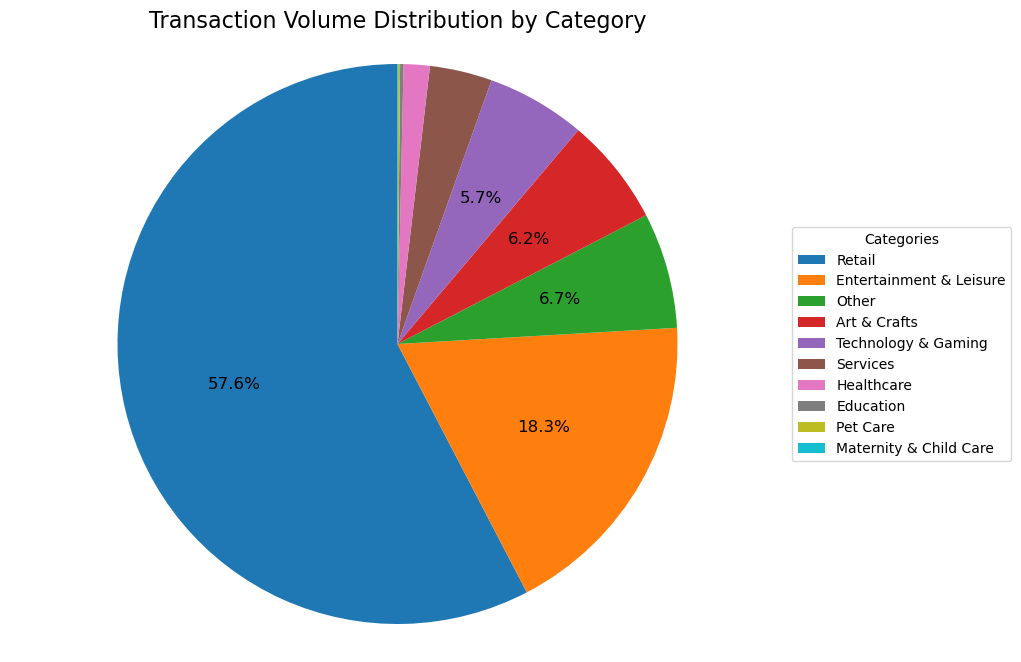

In [6]:
labels = category_counts.index
sizes = category_counts.values
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e., 'Retail')

# Adjusting the autopct parameter to only show percentages >= 5%
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct >= 5:
            return '{p:.1f}%'.format(p=pct)
        else:
            return ''
    return my_format

fig1, ax1 = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax1.pie(sizes, labels=None, autopct=autopct_format(sizes), startangle=90, textprops={'fontsize': 12})

ax1.axis('equal')
plt.title("Transaction Volume Distribution by Category", fontsize=16)
plt.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


## Transaction volume by different categories and the hour of the day

/var/folders/_8/qlp092fj5yl3b9z4wfj6h1d80000gn/T/ipykernel_14127/3242132705.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


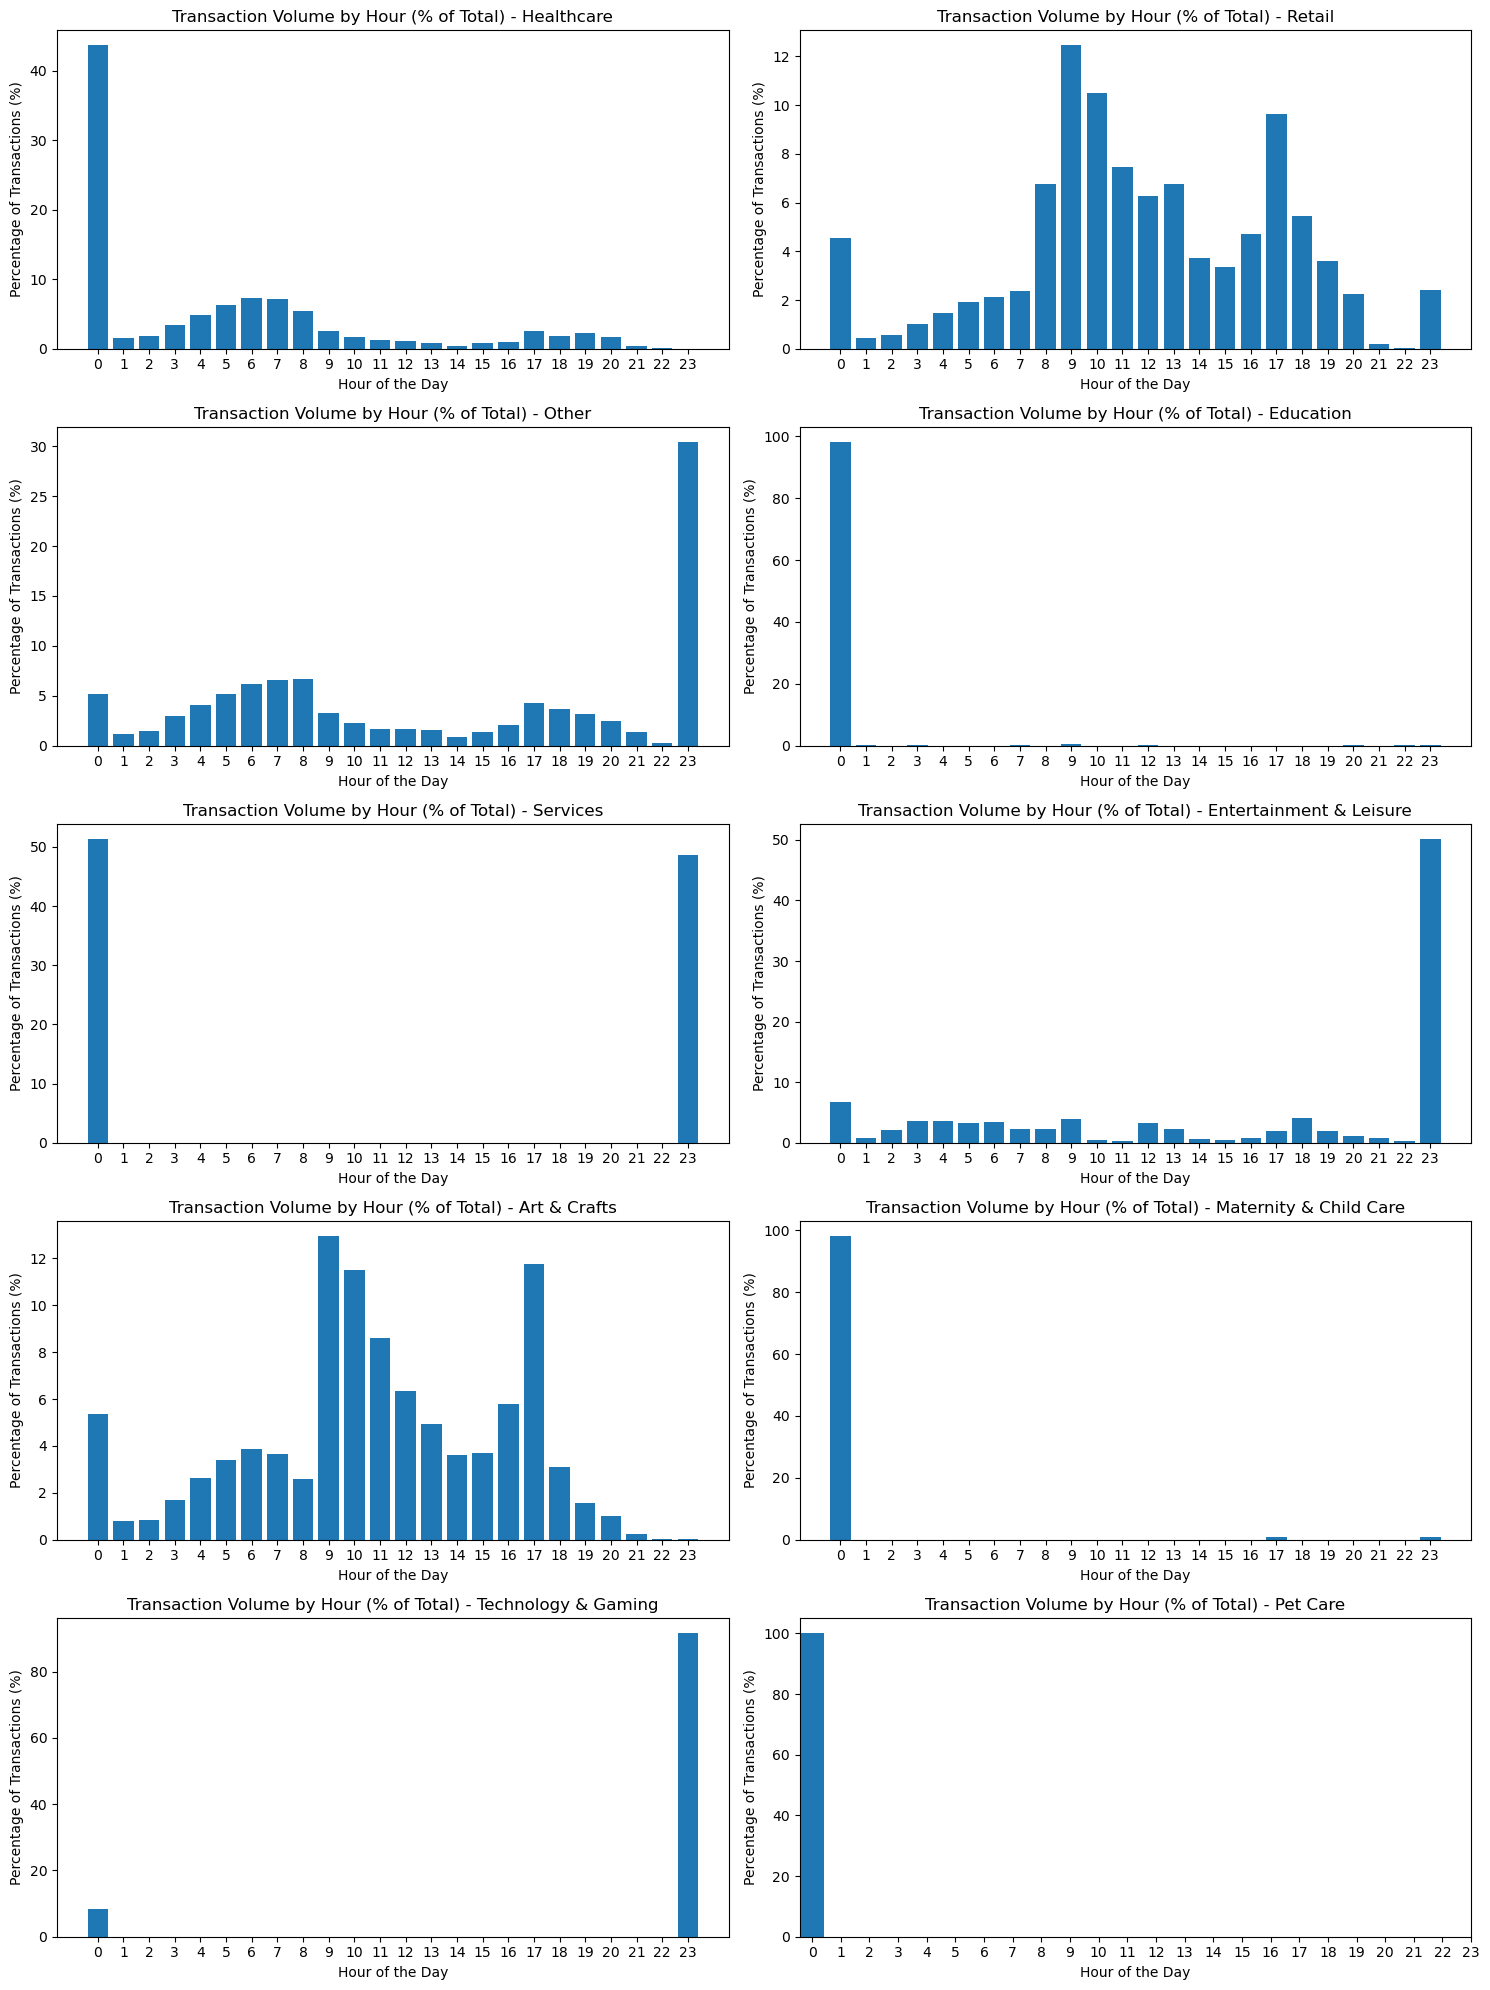

In [7]:
data['Hour'] = data['Datetime'].dt.hour

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20), constrained_layout=True)
axs = axs.flatten()

for index, category in enumerate(data['Category'].unique()):
    category_data = data[data['Category'] == category]
    hourly_counts = category_data.groupby('Hour').size()
    hourly_percentage = (hourly_counts / hourly_counts.sum()) * 100

    axs[index].bar(hourly_percentage.index, hourly_percentage.values)
    axs[index].set_title(f'Transaction Volume by Hour (% of Total) - {category}')
    axs[index].set_xlabel('Hour of the Day')
    axs[index].set_ylabel('Percentage of Transactions (%)')
    axs[index].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

Based on the transaction volume charts by hour for different categories, we can observe several distinct patterns:

1. **Healthcare**:
   - The chart indicates a massive spike in transactions right at the start of the day at 0:00. This could suggest automated processing of transactions, such as insurance payments or batched billing activities, which are often processed at the beginning of a new day.

2. **Retail**:
   - Retail transactions seem to have two noticeable peaks, one in the late morning and another in the early evening. This pattern aligns with typical shopping behavior, with people shopping during lunch hours and after work.

3. **Other**:
   - This category shows a more even distribution of transactions throughout the day with slight increases in early morning and mid-afternoon. The nature of these transactions could be more varied, hence the more uniform distribution.

4. **Education**:
   - There is a significant peak at 0:00 and virtually no activity throughout the rest of the day. This could indicate a system that processes transactions (like tuition or fee payments) at a specific time.

5. **Services**:
   - The spike at 0:00 suggests either automated billing or scheduled service charges. The absence of transactions during the day could mean that actual service payments are classified elsewhere or occur less frequently.

6. **Entertainment & Leisure**:
   - The volume is heavily skewed towards the end of the day, starting to rise in the afternoon and peaking at 23:00. This is consistent with leisure activities and entertainment usage, which typically increase after work hours.

7. **Art & Crafts**:
   - Transactions are more spread out with peaks at midday and in the evening, which might reflect the times when customers engage in leisure activities related to arts and crafts.

8. **Maternity & Child Care**:
   - With the majority of transactions occurring at 0:00, it's possible that this is related to automated payment systems or subscription services for child care facilities.

9. **Technology & Gaming**:
   - A huge peak at 0:00 could represent automated renewals or purchases that are processed when the day turns over. The smaller peak around 18:00-19:00 may indicate after-work purchasing behavior.

10. **Pet Care**:
    - With a sole peak at 0:00, similar to maternity and child care, this could point to automated payments or scheduled service charges, possibly for pet insurance or subscription-based pet services.

Overall, the 0:00 spikes across several categories are indicative of automated systems that process transactions at the start of a new day. The patterns seen in retail and entertainment align with typical consumer behavior, where transactions occur during likely shopping or leisure times.

## Transaction volume by month (3 times for September)

/var/folders/_8/qlp092fj5yl3b9z4wfj6h1d80000gn/T/ipykernel_14127/3728925815.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


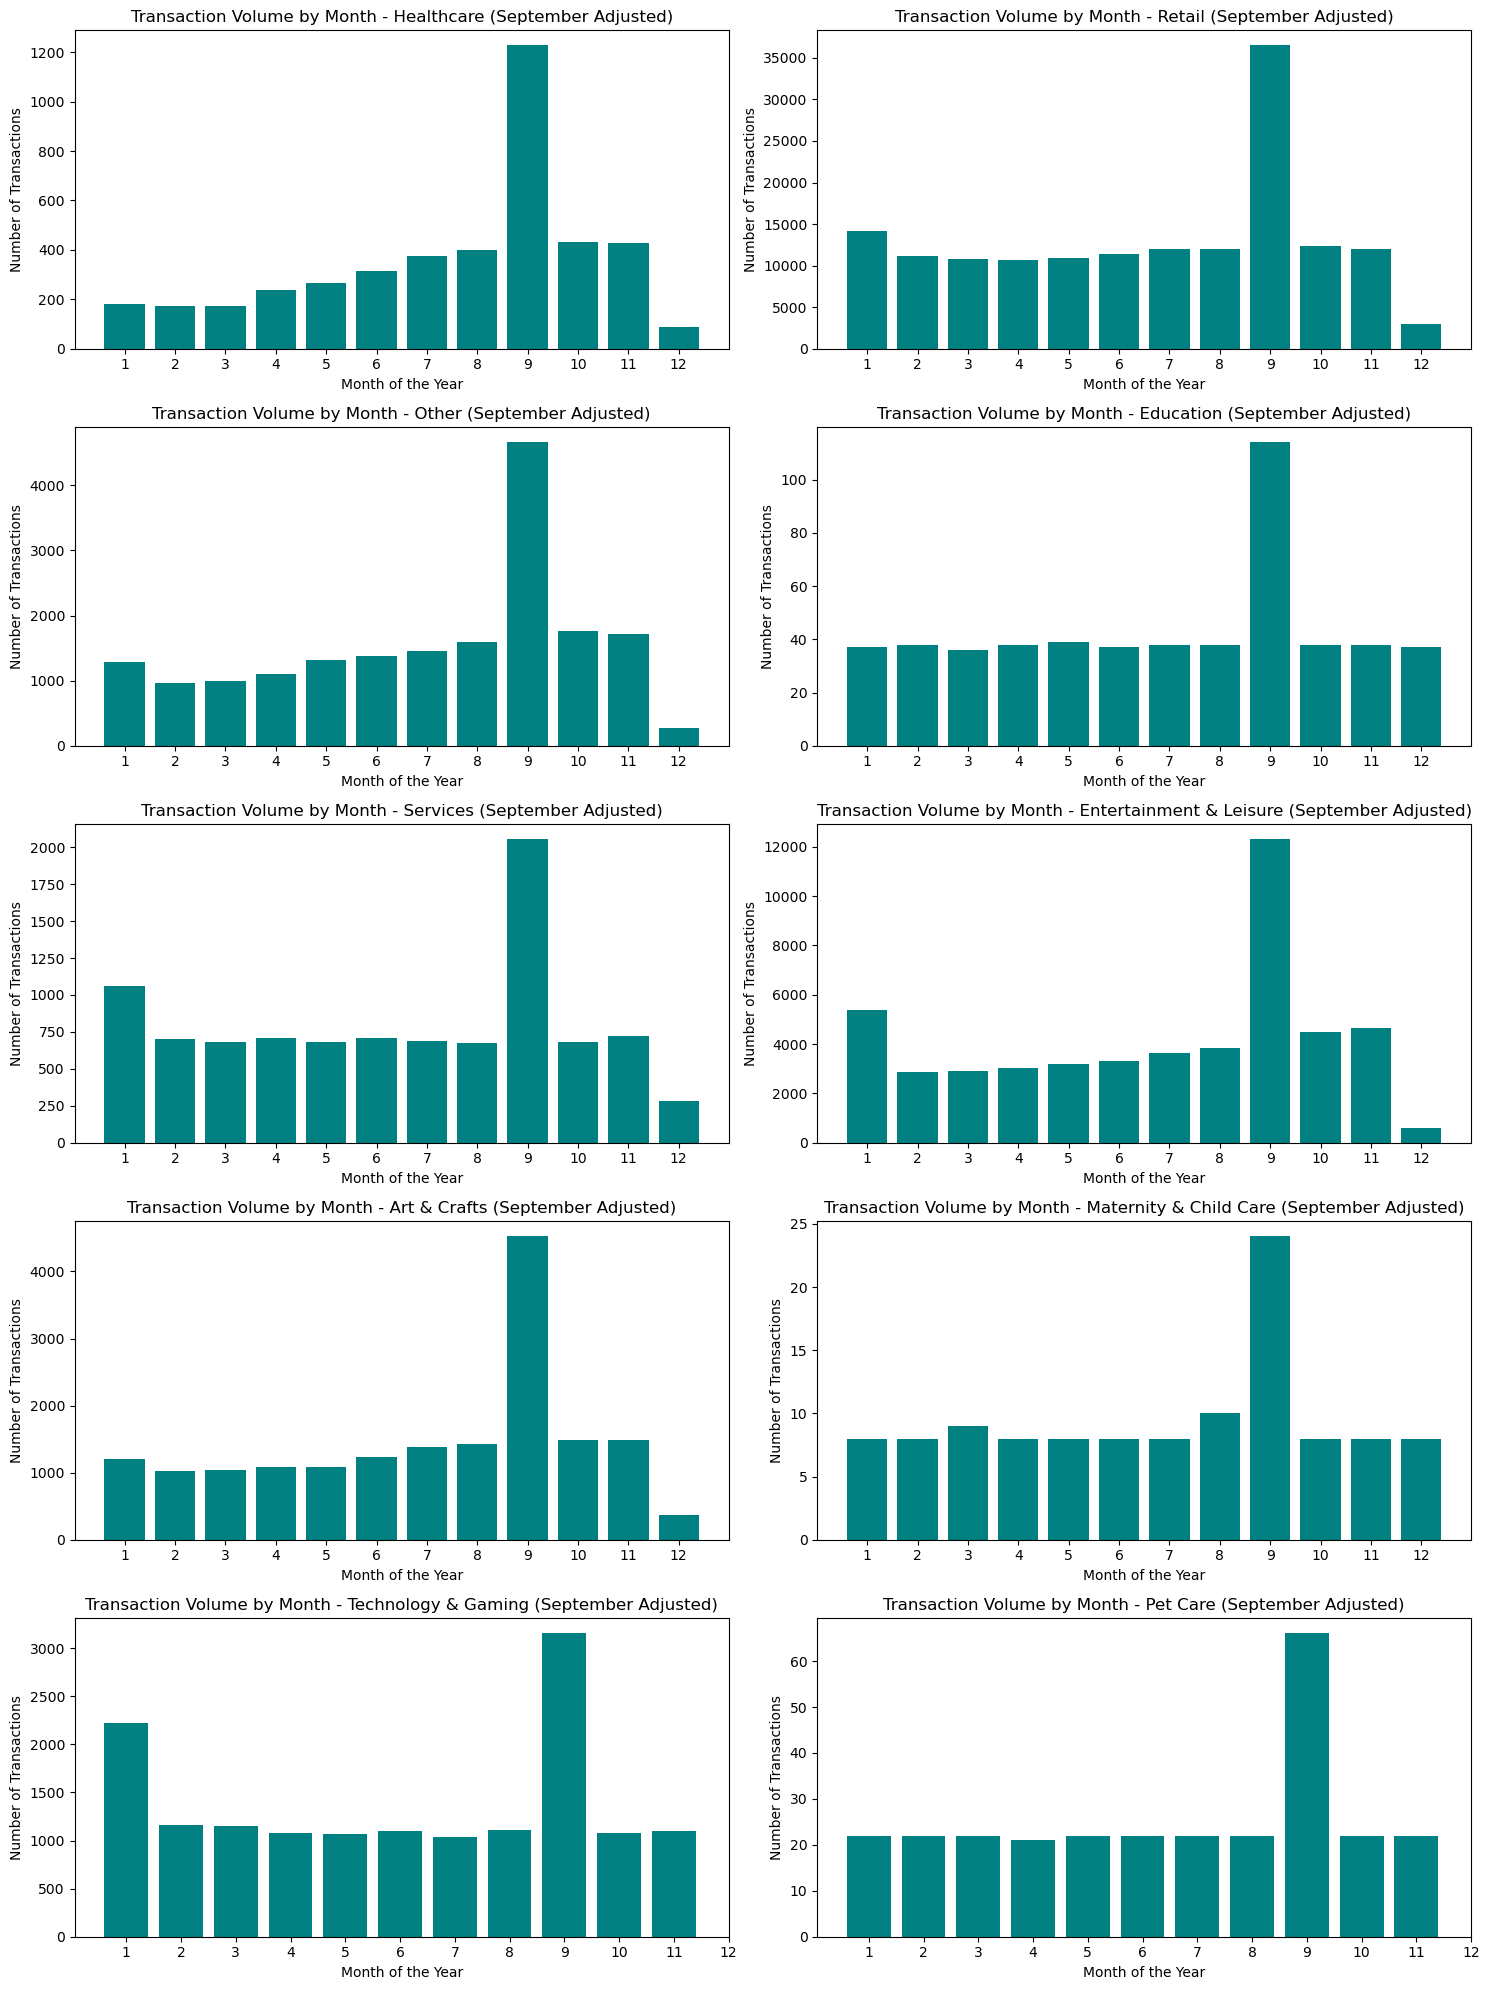

In [8]:
data['Month'] = data['Datetime'].dt.month
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20), constrained_layout=True)
axs = axs.flatten()

for index, category in enumerate(data['Category'].unique()):
    category_data = data[data['Category'] == category]
    monthly_counts = category_data.groupby('Month').size()

    if 9 in monthly_counts.index:
        monthly_counts[9] *= 3

    axs[index].bar(monthly_counts.index, monthly_counts.values, color='teal')
    axs[index].set_title(f'Transaction Volume by Month - {category} (September Adjusted)')
    axs[index].set_xlabel('Month of the Year')
    axs[index].set_ylabel('Number of Transactions')
    axs[index].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()


1. **Retail**
Retail sees robust transaction activity year-round with a significant peak in September due to seasonal sales like back-to-school promotions, and another in December, likely driven by holiday shopping.

2. **Entertainment & Leisure**
Transactions in Entertainment & Leisure peak during traditional vacation seasons, particularly in the summer and winter holidays, indicating increased spending on leisure activities during these periods.

3. **Services**
The Services category exhibits steady demand throughout the year with slight increases around mid-year and year-end, possibly due to financial and service renewals.

4. **Healthcare**
Healthcare transactions remain stable across the year, reflecting the essential and non-seasonal nature of medical services.

5. **Art & Crafts**
Art & Crafts transactions peak during the middle and end of the year, aligning with holiday seasons and summer breaks, suggesting increased hobby-related activities during these times.

6. **Technology & Gaming**
This category shows transaction peaks around mid-year and end-year, likely influenced by new technology releases and holiday sales.

7. **Pet Care**
Pet Care maintains a consistent transaction volume throughout the year, indicating steady demand for pet-related products and services.

8. **Maternity & Child Care**
Transaction volumes in Maternity & Child Care are low but steady, underscoring the essential and consistent nature of these services.

9. **Education**
Education-related transactions peak at the start and end of academic terms, reflecting spending tied to the school calendar.

10. **Other**
The Other category, which includes miscellaneous transactions, shows moderate fluctuations, suggesting varied activities that do not fit neatly into the main categories.


## Transactions volume by the day of the week

/var/folders/_8/qlp092fj5yl3b9z4wfj6h1d80000gn/T/ipykernel_14127/2474579240.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


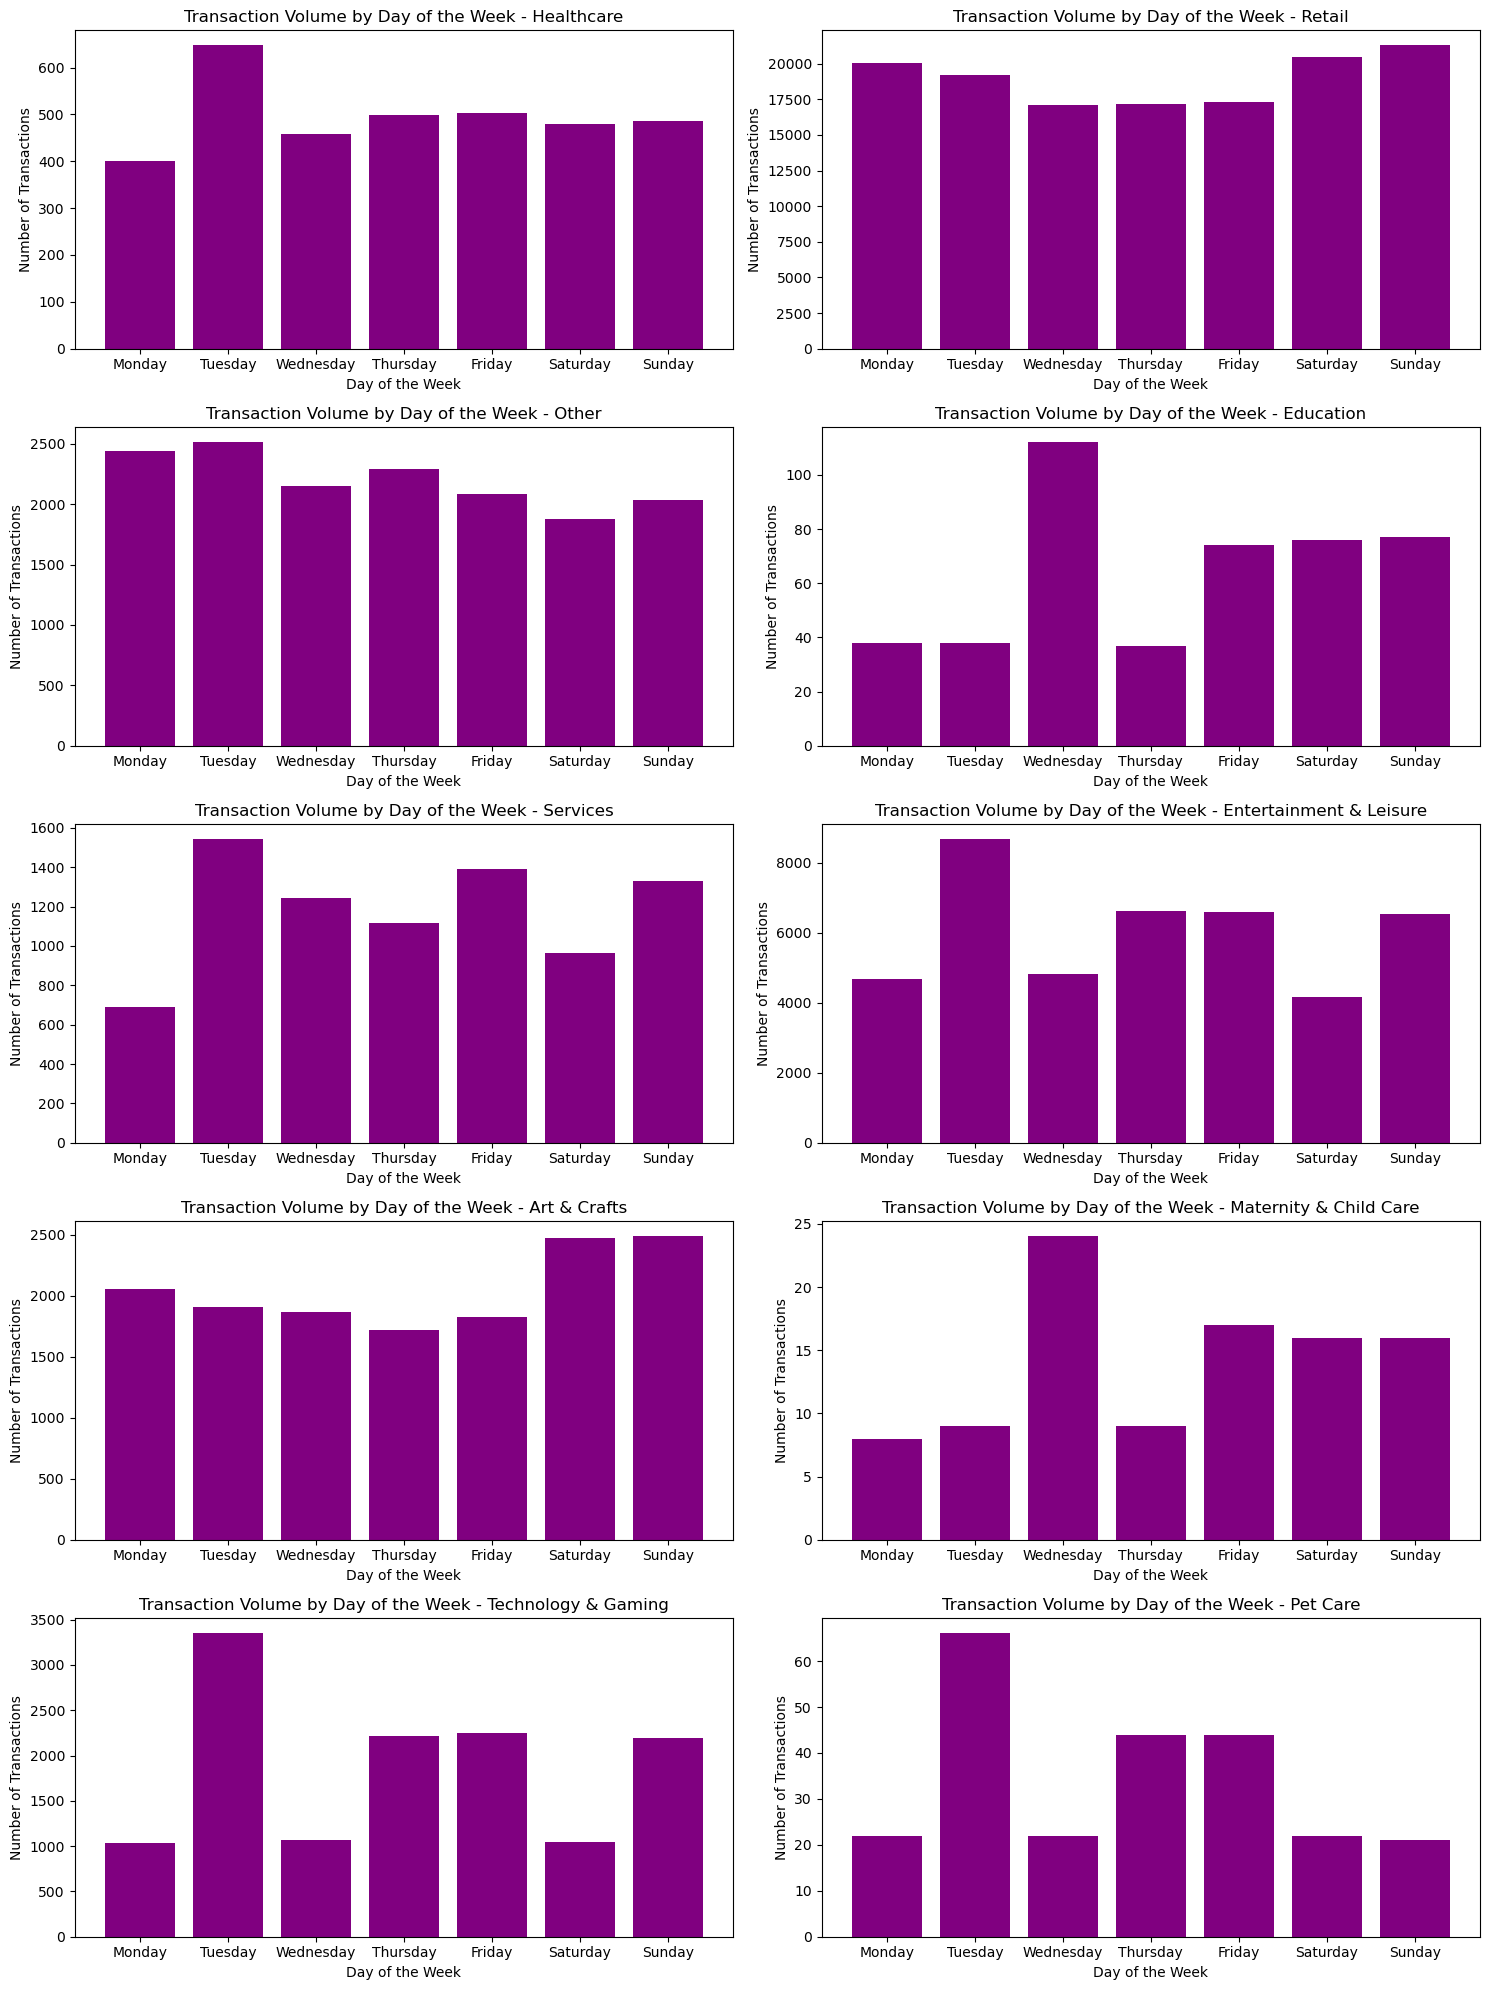

In [9]:
# Extract day of the week from datetime (Monday=0, Sunday=6)
data['DayOfWeek'] = data['Datetime'].dt.dayofweek


fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20), constrained_layout=True)
axs = axs.flatten()

for index, category in enumerate(data['Category'].unique()):
    category_data = data[data['Category'] == category]
    dayofweek_counts = category_data.groupby('DayOfWeek').size()

    axs[index].bar(dayofweek_counts.index, dayofweek_counts.values, color='purple')
    axs[index].set_title(f'Transaction Volume by Day of the Week - {category}')
    axs[index].set_xlabel('Day of the Week')
    axs[index].set_ylabel('Number of Transactions')
    axs[index].set_xticks(range(0, 7))
    axs[index].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.tight_layout()
plt.show()


The bar charts show the transaction volumes by day of the week for each category. Here are some observations from the charts:

1. **Healthcare**: Transaction volumes are relatively consistent across the weekdays, with a slight dip on the weekend. This pattern suggests regular visits or transactions that are not strongly affected by the day of the week.

2. **Retail**: There is a noticeable trend towards higher transaction volumes towards the end of the week, peaking on Fridays and Saturdays, which is typical for retail shopping behavior.

3. **Other**: The category labeled "Other" displays a relatively even distribution of transactions across the week with no significant peaks, indicating a variety of transaction types that don't have a specific day-of-week trend.

4. **Education**: There are very few transactions, with no clear pattern discernible. This could be due to the nature of educational payments, which might not occur weekly.

5. **Services**: The volume of transactions in services peaks mid-week, suggesting that people might tend to utilize and pay for services more in the middle of the week.

6. **Entertainment & Leisure**: There is a significant drop in transactions during the week with volumes peaking on Fridays and Saturdays, reflecting typical leisure activity patterns.

7. **Art & Crafts**: Transaction activity seems to increase slightly towards the weekend, which may reflect the time when people engage in hobbies or leisure shopping more frequently.

8. **Maternity & Child Care**: The number of transactions is quite low overall, with no significant pattern across the week. This could indicate that the transactions are not routine or that there are few entities categorized under this sector.

9. **Technology & Gaming**: The volume is higher mid-week, with a drop on the weekend. This is somewhat atypical for the industry and could indicate specific promotions or release cycles for products and games.

10. **Pet Care**: There's some fluctuation in transaction volume with no clear trend, suggesting that transactions in this category may not be influenced by the day of the week.

These patterns can help businesses tailor their services, promotions, and staffing to meet customer demand effectively. For example, retailers might want to schedule more staff on Fridays and Saturdays to handle increased customer flow, while entertainment venues might focus their marketing efforts towards the end of the week.

## Balance by each category

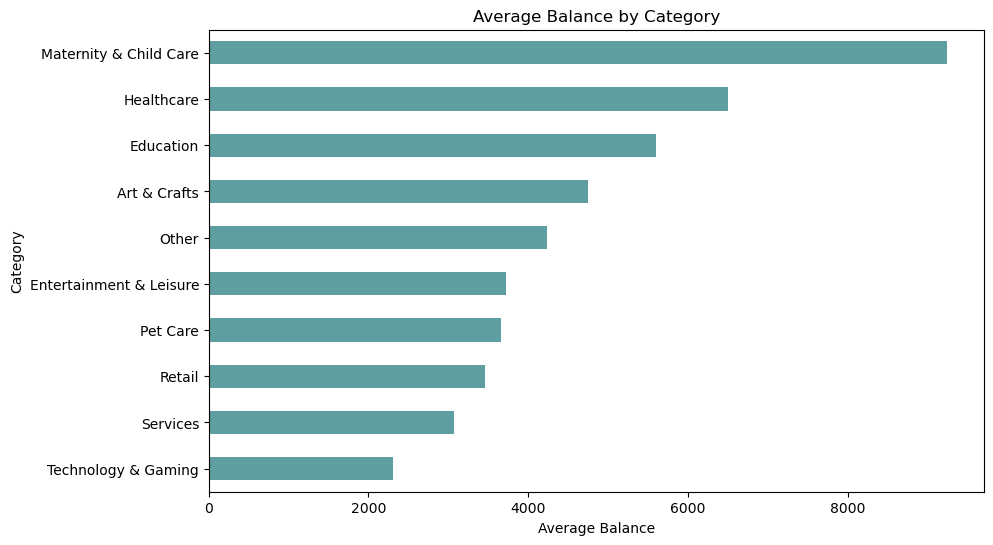

In [10]:
# Group data by category and calculate the average balance
average_balances = data.groupby('Category')['Balance'].mean()

average_balances = average_balances.sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
average_balances.plot(kind='barh', color='cadetblue')
plt.title('Average Balance by Category')
plt.xlabel('Average Balance')
plt.ylabel('Category')
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import chisquare

data['Datetime'] = pd.to_datetime(data['Datetime'])
data['Hour'] = data['Datetime'].dt.hour
data['IsWeekend'] = data['Datetime'].dt.dayofweek >= 5

data['IsThirdPartyKnown'] = data['Third Party Account No'] != 'Unknown'
data['Category'] = data['Third Party Name'].apply(categorize_third_party)
target = data['Category']
features = data[['Hour', 'IsWeekend', 'IsThirdPartyKnown']]
print(features.head())




   Hour  IsWeekend  IsThirdPartyKnown
0   0.0       True               True
1   0.0       True               True
2   0.0       True               True
3   0.0       True               True
4   0.0       True               True


In [15]:
import pandas as pd
category_variance = data.groupby('Category')['Amount'].var()
total_variance = category_variance.sum()

neyman_allocation = (category_variance / total_variance * 230596).astype(int)  
category_counts = data['Category'].value_counts()
minimum_samples_per_category = 50 

# Adjust Neyman allocation, taking into account minimum sample size and replacement options
adjusted_neyman_allocation = {
    category: max(min(size, category_counts[category]), minimum_samples_per_category)
    for category, size in neyman_allocation.items()
}

# Use replacement sampling to increase sample size
samples = []
for category, size in adjusted_neyman_allocation.items():
    if category_counts[category] < minimum_samples_per_category:
        replace = True
    else:
        replace = False
    category_samples = data[data['Category'] == category].sample(n=size, replace=replace, random_state=42)
    samples.append(category_samples)

final_sample = pd.concat(samples)
print(final_sample['Category'].value_counts())



Category
Other                      15416
Services                    8295
Art & Crafts                7441
Retail                      4265
Healthcare                  3477
Entertainment & Leisure     1437
Education                    454
Pet Care                     242
Maternity & Child Care        99
Technology & Gaming           50
Name: count, dtype: int64


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Feature engineering
data['Datetime'] = pd.to_datetime(data['Datetime'])
data['Hour'] = data['Datetime'].dt.hour
data['IsWeekend'] = data['Datetime'].dt.dayofweek >= 5
data['IsThirdPartyKnown'] = data['Third Party Account No'] != 'Unknown'
data['Day_of_Week'] = data['Datetime'].dt.dayofweek
data['Day_of_Month'] = data['Datetime'].dt.day

data['Category'] = data['Third Party Name'].apply(categorize_third_party)

le = LabelEncoder()
data['Category_Encoded'] = le.fit_transform(data['Category'])

features = data[['Amount', 'Hour', 'IsWeekend', 'IsThirdPartyKnown', 'Day_of_Week', 'Day_of_Month', 'Category_Encoded']]
print(features.head())


   Amount  Hour  IsWeekend  IsThirdPartyKnown  Day_of_Week  Day_of_Month  \
0  1584.0   0.0       True               True          6.0           1.0   
1  1950.0   0.0       True               True          6.0           1.0   
2  -780.0   0.0       True               True          6.0           1.0   
3   780.0   0.0       True               True          6.0           1.0   
4  1825.0   0.0       True               True          6.0           1.0   

   Category_Encoded  
0                 3  
1                 7  
2                 5  
3                 5  
4                 7  


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Feature extraction and transformation
data['Datetime'] = pd.to_datetime(data['Datetime'])
data['Hour'] = data['Datetime'].dt.hour
data['IsWeekend'] = data['Datetime'].dt.dayofweek >= 5
data['IsThirdPartyKnown'] = data['Third Party Account No'] != 'Unknown'
data['Day_of_Week'] = data['Datetime'].dt.dayofweek
data['Day_of_Month'] = data['Datetime'].dt.day

data['Category'] = data['Third Party Name'].apply(categorize_third_party)

le = LabelEncoder()
data['Category_Encoded'] = le.fit_transform(data['Category'])

features = data[['Amount', 'Hour', 'IsWeekend', 'IsThirdPartyKnown', 'Day_of_Week', 'Day_of_Month', 'Category_Encoded']]
print(features.head())

X_train, X_test, y_train, y_test = train_test_split(features, data['Category_Encoded'], test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


   Amount  Hour  IsWeekend  IsThirdPartyKnown  Day_of_Week  Day_of_Month  \
0  1584.0   0.0       True               True          6.0           1.0   
1  1950.0   0.0       True               True          6.0           1.0   
2  -780.0   0.0       True               True          6.0           1.0   
3   780.0   0.0       True               True          6.0           1.0   
4  1825.0   0.0       True               True          6.0           1.0   

   Category_Encoded  
0                 3  
1                 7  
2                 5  
3                 5  
4                 7  
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4314
           1       1.00      0.99      0.99       146
           2       1.00      1.00      1.00     12574
           3       1.00      1.00      1.00      1031
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00      4578
           6       1.00      0.9

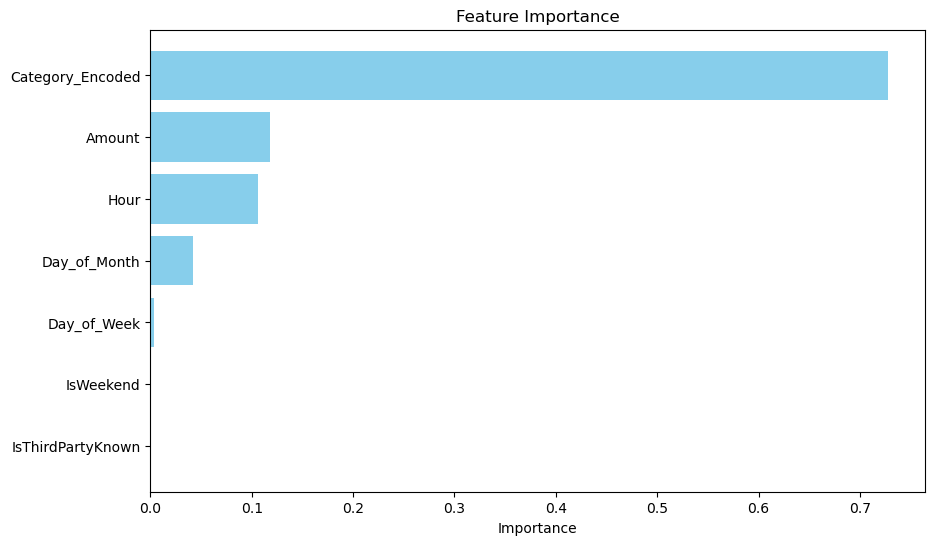

In [18]:
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = features.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Draw feature importance map
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = data[['Amount', 'Hour', 'IsWeekend', 'IsThirdPartyKnown', 'Day_of_Week', 'Day_of_Month']]
y = data['Category_Encoded']

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross validation
scores = cross_val_score(model, X, y, cv=5)  # 5折交叉验证

print("Accuracy scores for each fold:", scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Accuracy scores for each fold: [0.68820468 0.69405234 0.61248076 0.65322318 0.72822481]
Average cross-validation score: 0.68


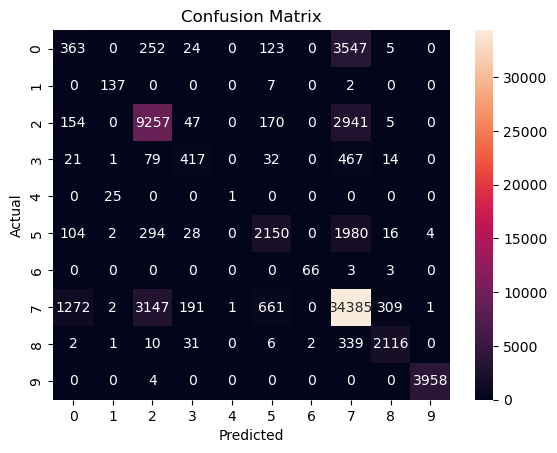

              precision    recall  f1-score   support

           0       0.19      0.08      0.12      4314
           1       0.82      0.94      0.87       146
           2       0.71      0.74      0.72     12574
           3       0.57      0.40      0.47      1031
           4       0.50      0.04      0.07        26
           5       0.68      0.47      0.56      4578
           6       0.97      0.92      0.94        72
           7       0.79      0.86      0.82     39969
           8       0.86      0.84      0.85      2507
           9       1.00      1.00      1.00      3962

    accuracy                           0.76     69179
   macro avg       0.71      0.63      0.64     69179
weighted avg       0.74      0.76      0.75     69179



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(classification_report(y_test, y_pred))


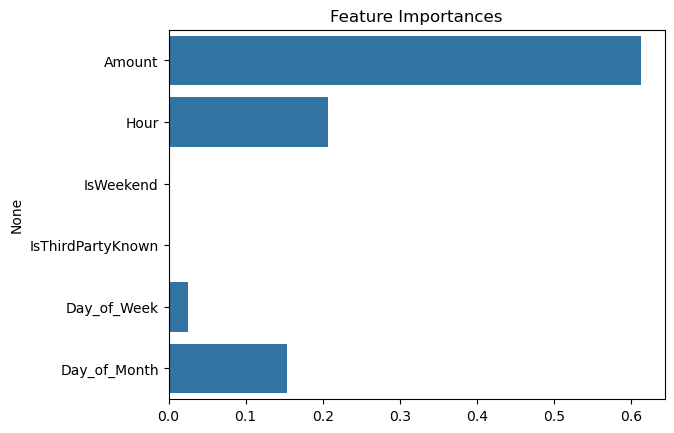

In [21]:
feature_importances = model.feature_importances_
features = X.columns

# Visualize feature importance
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.show()
